# 安装TensorFlow GPU版本

In [0]:
!pip install tensorflow-gpu

    100% |████████████████████████████████| 281.7MB 66kB/s 


##### 安装keras

In [0]:
!pip install keras

# 用TensorFlow查看GPU信息

##### 查看是否有GPU

In [3]:
gpu_device_name = tf.test.gpu_device_name()
print(gpu_device_name)

/device:GPU:0


##### GPU是否可以用

In [4]:
tf.test.is_gpu_available()

True

##### 列出本地的机器信息

In [6]:
from tensorflow.python.client import device_lib # 列出所有的本地机器设备 
local_device_protos = device_lib.list_local_devices() # 打印 
print(local_device_protos) 
# 只打印GPU设备 
[print(x) for x in local_device_protos if x.device_type == 'GPU']


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 94770586443875998
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 3717203045672747445
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 13950212339754898365
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11276946637
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3242165785135882586
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]
name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11276946637
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3242165785135882586
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"



[None]

# 测试GPU和CPU的执行性能

In [0]:
def performanceTest(device_name,size):
    with tf.device(device_name): #选择具体的哪一个设备
        W = tf.random_normal([size, size],name='W') #以随机产生数值的方式建立W矩阵
        X = tf.random_normal([size, size],name='X') #以随机产生数值的方式建立X矩阵
        mul = tf.matmul(W, X,name='mul')
        sum_result = tf.reduce_sum(mul,name='sum') #将mul矩阵里面的值加总

    startTime = time.time() #记录开始运行的时间
    tfconfig=tf.ConfigProto(log_device_placement=True) #代表显示设备的相关信息
    with tf.Session(config=tfconfig) as sess:
        result = sess.run(sum_result)
    takeTimes=time.time()  - startTime   
    print(device_name," size=",size,"Time:",takeTimes )
    return takeTimes #返回运行时间

In [8]:
g=performanceTest("/gpu:0",100)
c=performanceTest("/cpu:0",100)

/gpu:0  size= 100 Time: 0.7048304080963135
/cpu:0  size= 100 Time: 0.038219451904296875


In [9]:
g=performanceTest("/gpu:0",200)
c=performanceTest("/cpu:0",200)

/gpu:0  size= 200 Time: 0.01403498649597168
/cpu:0  size= 200 Time: 0.0194242000579834


In [10]:
g=performanceTest("/gpu:0",1000)
c=performanceTest("/cpu:0",1000)

/gpu:0  size= 1000 Time: 0.01311945915222168
/cpu:0  size= 1000 Time: 0.1013486385345459


In [11]:
g=performanceTest("/gpu:0",5000)
c=performanceTest("/cpu:0",5000)

/gpu:0  size= 5000 Time: 0.17576313018798828
/cpu:0  size= 5000 Time: 3.400740146636963


In [14]:
gpu_set=[];cpu_set=[];i_set=[]
for i in range(0,5001,500):
    g=performanceTest("/gpu:0",i)
    c=performanceTest("/cpu:0",i)
    gpu_set.append(g);cpu_set.append(c);i_set.append(i)
    print("##########################")

/gpu:0  size= 0 Time: 0.4013850688934326
/cpu:0  size= 0 Time: 0.22393250465393066
##########################
/gpu:0  size= 500 Time: 0.296217679977417
/cpu:0  size= 500 Time: 0.4245729446411133
##########################
/gpu:0  size= 1000 Time: 0.18050003051757812
/cpu:0  size= 1000 Time: 0.2570662498474121
##########################
/gpu:0  size= 1500 Time: 0.21580886840820312
/cpu:0  size= 1500 Time: 0.4735269546508789
##########################
/gpu:0  size= 2000 Time: 0.18517041206359863
/cpu:0  size= 2000 Time: 0.5582160949707031
##########################
/gpu:0  size= 2500 Time: 0.16060090065002441
/cpu:0  size= 2500 Time: 0.8890912532806396
##########################
/gpu:0  size= 3000 Time: 0.2157294750213623
/cpu:0  size= 3000 Time: 1.2854430675506592
##########################
/gpu:0  size= 3500 Time: 0.2256307601928711
/cpu:0  size= 3500 Time: 1.849276065826416
##########################
/gpu:0  size= 4000 Time: 0.24950551986694336
/cpu:0  size= 4000 Time: 2.6612839698791

##### 将结果进行可视化

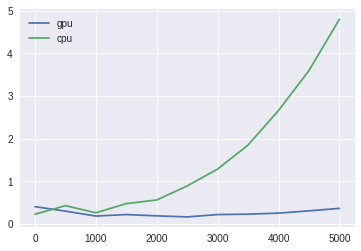

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(6,4)
plt.plot(i_set, gpu_set, label = 'gpu')
plt.plot(i_set, cpu_set, label = 'cpu')
plt.legend()